# 1 - Representativeness of the Collected Data - Tutorial

The students had the possibility to decide if their actions in ILIAS should be tracked anonymously or with pseudonyms. A decision for pseudonyms would imply that the events in the data set (produced by the actions taken in ILIAS) can be connected to one person respectively ID as I don't know (due to privacy protection issues) which ID belongs to which "real life" person. As "anonymous" was actually the default option, only 10.7% of the students changed this setting to "pseudonymous". One aspect of the following report will therefore be: Is the data and the collected behaviour of the pseudonymous students representative for the whole course? Later on this will facilitate to generalise our findings for the whole course. 

**ideas for creating TIME variables**

+ time difference
+ point of time / day / week
    + weekend y/n
    + morning / noon / afternoon / night
+ time left until exam

**ideas for creating FILE variables**

+ distribution over file types
+ distribution over files?

In [1]:
import pandas as pd
import re 
import numpy as np
from dateutil import parser
from datetime import datetime
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [2]:
results = pd.read_csv('tut-events-and-resources.csv', delimiter=";", encoding="utf-8")
results.head()

,Unnamed: 0,event_id,student_id,resource_id,type_x,timestamp,content,createDate,description,leapId,name,numberOfEvents,type_y,uri
0,0,292,2,39,click,19.09.2017 19:42,NaN,19.09.2017 17:42:21,NaN,39,Übungsblätter Teil 1,1443,exc,https://ilias.uni-mannheim.de/goto.php?target=...
1,1,293,2,39,click,19.09.2017 19:42,NaN,19.09.2017 17:42:21,NaN,39,Übungsblätter Teil 1,1443,exc,https://ilias.uni-mannheim.de/goto.php?target=...
2,2,294,2,39,click,19.09.2017 19:43,NaN,19.09.2017 17:42:21,NaN,39,Übungsblätter Teil 1,1443,exc,https://ilias.uni-mannheim.de/goto.php?target=...
3,3,295,2,39,click,19.09.2017 19:43,NaN,19.09.2017 17:42:21,NaN,39,Übungsblätter Teil 1,1443,exc,https://ilias.uni-mannheim.de/goto.php?target=...
4,4,296,2,39,click,19.09.2017 19:43,NaN,19.09.2017 17:42:21,NaN,39,Übungsblätter Teil 1,1443,exc,https://ilias.uni-mannheim.de/goto.php?target=...


## date parsing and attribute creation

In [3]:
def parsing_with_sec(date_str):
    parsed = datetime.strptime(date_str, "%d.%m.%Y %H:%M:%S")
    return parsed
def parsing_without_sec(date_str):
    parsed = datetime.strptime(date_str, "%d.%m.%Y %H:%M")
    return parsed

In [4]:
results["timestamp"] = results["timestamp"].apply(parsing_without_sec)
results["createDate"] = results["createDate"].apply(parsing_with_sec)

results["time_diff"] = results["timestamp"] - results["createDate"]

In [5]:
exam1 = datetime.strptime("2017-12-12 17:00", "%Y-%m-%d %H:%M")
results["time_to_exam1"] = exam1 - results["timestamp"]
exam2 = datetime.strptime("2018-02-07 15:00", "%Y-%m-%d %H:%M")
results["time_to_exam2"] = exam2 - results["timestamp"]

In [6]:
def weekdaynumber(date):
    return date.weekday()

results["weekday"] = results["timestamp"].apply(weekdaynumber) + 1    

In [7]:
def part_of_day(date):
    return date.hour

results["part_of_day"] = results["timestamp"].apply(part_of_day)

In [8]:
def weeknumber(date):
    return date.isocalendar()[1]

results["weeknumber"] = results["timestamp"].apply(weeknumber)

In [9]:
results["status"] = np.where(results["student_id"] == 2, 'anonym', 'pseudonym')

In [10]:
pseudonym = results[results['student_id'] != 2]
anonym = results[results['student_id'] == 2]

In [11]:
pseudonym.describe()

,Unnamed: 0,event_id,student_id,resource_id,leapId,numberOfEvents,time_diff,time_to_exam1,time_to_exam2,weekday,part_of_day,weeknumber
count,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000,5995,5995,5995,5995.000000,5995.000000,5995.000000
mean,33963.192494,64611.739950,243.038699,134.323937,134.323937,3161.442202,31 days 20:17:48.448373,45 days 10:45:41.814845,102 days 08:45:41.814845,3.459216,14.161968,41.673561
std,18338.821068,35385.410558,111.347963,130.892229,130.892229,3040.833028,26 days 00:11:59.750715,26 days 14:32:21.679749,26 days 14:32:21.679749,2.104414,5.812378,7.750469
min,106.000000,708.000000,40.000000,39.000000,39.000000,2.000000,-1 days +23:59:05,-42 days +20:23:00,15 days 18:23:00,1.000000,0.000000,1.000000
25%,17886.500000,34167.500000,185.000000,50.000000,50.000000,1417.000000,11 days 06:31:43,29 days 03:25:00,86 days 01:25:00,1.000000,12.000000,40.000000
50%,34431.000000,65641.000000,283.000000,75.000000,75.000000,2065.000000,26 days 15:24:27,49 days 04:19:00,106 days 02:19:00,3.000000,15.000000,43.000000
75%,48456.500000,88340.500000,332.000000,102.000000,102.000000,3740.000000,47 days 01:53:43,67 days 17:43:00,124 days 15:43:00,5.000000,18.000000,45.000000
max,69804.000000,143441.000000,396.000000,608.000000,608.000000,9583.000000,125 days 02:46:12,83 days 19:23:00,140 days 17:23:00,7.000000,23.000000,52.000000


In [12]:
anonym.describe()

,Unnamed: 0,event_id,student_id,resource_id,leapId,numberOfEvents,time_diff,time_to_exam1,time_to_exam2,weekday,part_of_day,weeknumber
count,64619.000000,64619.000000,64619.0,64619.000000,64619.000000,64619.000000,64619,64619,64619,64619.000000,64619.000000,64619.000000
mean,35431.124778,68005.977143,2.0,146.133583,146.133583,2806.269627,33 days 03:11:26.630124,42 days 14:44:12.912920,99 days 12:44:12.912920,3.654451,14.567217,41.823752
std,20559.817439,40156.757750,0.0,143.223064,143.223064,2904.702566,28 days 13:21:32.388042,29 days 17:54:42.085395,29 days 17:54:42.085395,2.179491,5.567615,8.362828
min,0.000000,292.000000,2.0,39.000000,39.000000,1.000000,-1 days +23:50:24,-45 days +00:26:00,11 days 22:26:00,1.000000,0.000000,1.000000
25%,17599.500000,33418.500000,2.0,50.000000,50.000000,988.000000,9 days 17:25:09.500000,21 days 07:04:00,78 days 05:04:00,1.000000,12.000000,40.000000
50%,35452.000000,67857.000000,2.0,75.000000,75.000000,1836.000000,26 days 00:12:01,47 days 22:07:00,104 days 20:07:00,3.000000,15.000000,43.000000
75%,53519.500000,98160.500000,2.0,219.000000,219.000000,2829.000000,49 days 23:04:12,67 days 23:21:00,124 days 21:21:00,6.000000,18.000000,46.000000
max,70613.000000,145376.000000,2.0,626.000000,626.000000,9583.000000,128 days 22:42:12,83 days 22:53:00,140 days 20:53:00,7.000000,23.000000,52.000000


### visualizing event date differences

In [13]:
def to_seconds(delta):
    return delta.total_seconds()

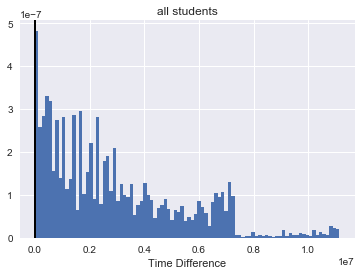

In [14]:
plt.hist(results["time_diff"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("all students")
plt.xlabel("Time Difference")

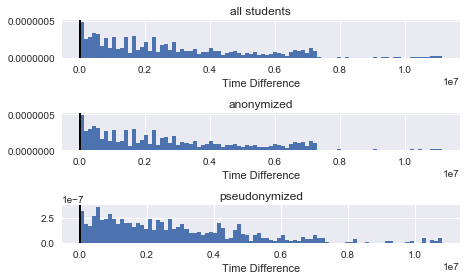

In [15]:
plt.subplot(311)
plt.hist(results["time_diff"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("all students")
plt.xlabel("Time Difference")

plt.subplot(312)
plt.hist(anonym["time_diff"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("anonymized")
plt.xlabel("Time Difference")

plt.subplot(313)
plt.hist(pseudonym["time_diff"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("pseudonymized")
plt.xlabel("Time Difference")
plt.tight_layout()

In [16]:
mannwhitneyu(anonym["time_diff"].apply(to_seconds), pseudonym["time_diff"].apply(to_seconds), alternative='two-sided')

MannwhitneyuResult(statistic=193162546.0, pvalue=0.72412296711418866)

In [17]:
ttest_ind(anonym["time_diff"].apply(to_seconds), pseudonym["time_diff"].apply(to_seconds), equal_var=False)

Ttest_indResult(statistic=3.6343101271221796, pvalue=0.00028061507869550374)

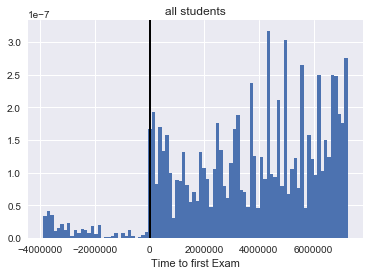

In [18]:
plt.hist(results["time_to_exam1"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("all students")
plt.xlabel("Time to first Exam")

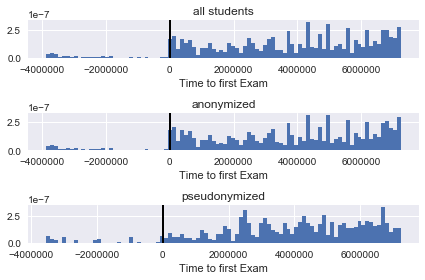

In [19]:
plt.subplot(311)
plt.hist(results["time_to_exam1"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("all students")
plt.xlabel("Time to first Exam")

plt.subplot(312)
plt.hist(anonym["time_to_exam1"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("anonymized")
plt.xlabel("Time to first Exam")

plt.subplot(313)
plt.hist(pseudonym["time_to_exam1"].apply(to_seconds), normed=True, bins=90)
plt.axvline(x=0, linewidth=2, color='k')
plt.title("pseudonymized")
plt.xlabel("Time to first Exam")
plt.tight_layout()

In [20]:
mannwhitneyu(anonym["time_to_exam1"].apply(to_seconds), pseudonym["time_to_exam1"].apply(to_seconds), alternative='two-sided')

MannwhitneyuResult(statistic=185640633.0, pvalue=9.5617058797114649e-08)

In [21]:
ttest_ind(anonym["time_to_exam1"].apply(to_seconds), pseudonym["time_to_exam1"].apply(to_seconds), equal_var=False)

Ttest_indResult(statistic=-7.8081370225725921, pvalue=6.5965260605769901e-15)

## weekday and part of day

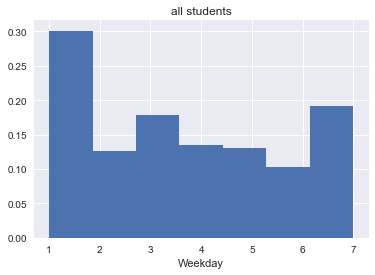

In [22]:
plt.hist(results["weekday"], normed=True, bins=7)
plt.title("all students")
plt.xlabel("Weekday")

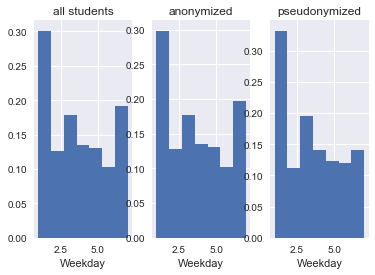

In [23]:
plt.subplot(131)
plt.hist(results["weekday"], normed=True, bins=7)
plt.title("all students")
plt.xlabel("Weekday")

plt.subplot(132)
plt.hist(anonym["weekday"], normed=True, bins=7)
plt.title("anonymized")
plt.xlabel("Weekday")

plt.subplot(133)
plt.hist(pseudonym["weekday"], normed=True, bins=7)
plt.title("pseudonymized")
plt.xlabel("Weekday")

In [24]:
mannwhitneyu(anonym["weekday"], pseudonym["weekday"], alternative='two-sided')

MannwhitneyuResult(statistic=203504590.0, pvalue=4.1985737932988028e-11)

In [25]:
ttest_ind(anonym["weekday"], pseudonym["weekday"], equal_var=False)

Ttest_indResult(statistic=6.8504968577984151, pvalue=7.963777605212744e-12)

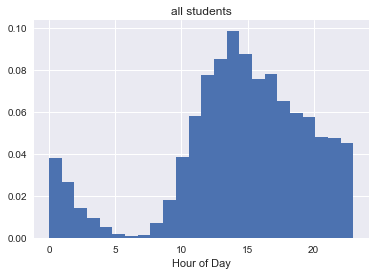

In [26]:
plt.hist(results["part_of_day"], normed=True, bins=24)
plt.title("all students")
plt.xlabel("Hour of Day")

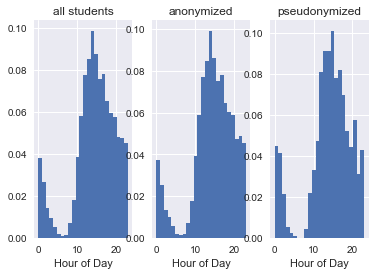

In [27]:
plt.subplot(131)
plt.hist(results["part_of_day"], normed=True, bins=24)
plt.title("all students")
plt.xlabel("Hour of Day")

plt.subplot(132)
plt.hist(anonym["part_of_day"], normed=True, bins=24)
plt.title("anonymized")
plt.xlabel("Hour of Day")

plt.subplot(133)
plt.hist(pseudonym["part_of_day"], normed=True, bins=24)
plt.title("pseudonymized")
plt.xlabel("Hour of Day")

In [28]:
mannwhitneyu(anonym["part_of_day"], pseudonym["part_of_day"], alternative='two-sided')

MannwhitneyuResult(statistic=199508517.0, pvalue=0.00011409245988907217)

In [29]:
ttest_ind(anonym["part_of_day"], pseudonym["part_of_day"], equal_var=False)

Ttest_indResult(statistic=5.1822988623705166, pvalue=2.2524985546317552e-07)

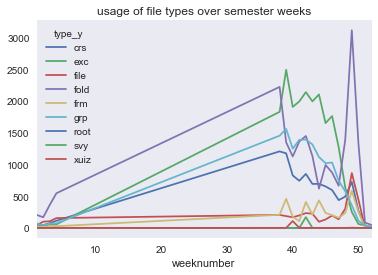

In [30]:
ct1 = pd.crosstab(index=results["weeknumber"], columns = results["type_y"])
ct1.plot(grid=False, title="usage of file types over semester weeks")
#ct1

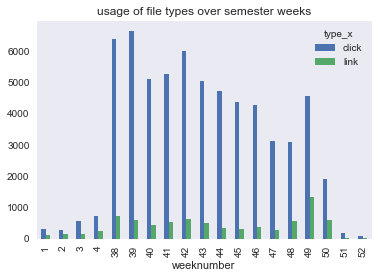

In [31]:
ct2 = pd.crosstab(index=results["weeknumber"], columns = results["type_x"])
ct2.plot(kind='bar', grid=False, title="usage of file types over semester weeks")
#ct2

## different types of events

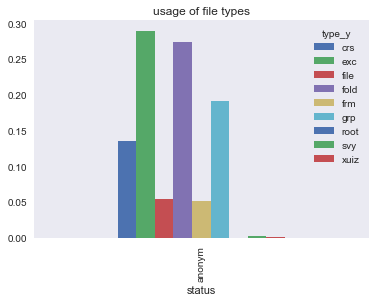

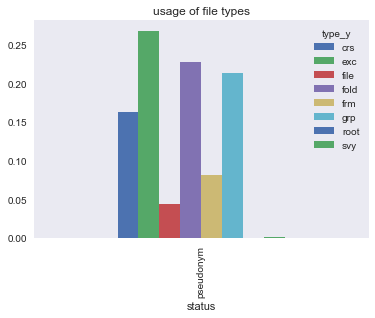

In [32]:
ct3 = pd.crosstab(index=anonym["status"], columns = results["type_y"], normalize=True)
ct3.plot(kind='bar', grid=False, title="usage of file types")

ct4 = pd.crosstab(index=pseudonym["status"], columns = results["type_y"], normalize=True)
ct4.plot(kind='bar', grid=False, title="usage of file types")

In [33]:
pd.crosstab(index=anonym["type_y"], columns = anonym["type_x"])

type_x,click,link
type_y,,
crs,8172,574
exc,18711,0
file,32,3523
fold,16201,1489
frm,3292,0
grp,10720,1621
root,0,3
svy,163,0
xuiz,118,0


In [34]:
pd.crosstab(index=pseudonym["type_y"], columns = pseudonym["type_x"])

type_x,click,link
type_y,,
crs,896,81
exc,1608,0
file,0,264
fold,1250,113
frm,491,0
grp,1096,186
root,0,2
svy,8,0
